# ETHEREUM Price Prediction
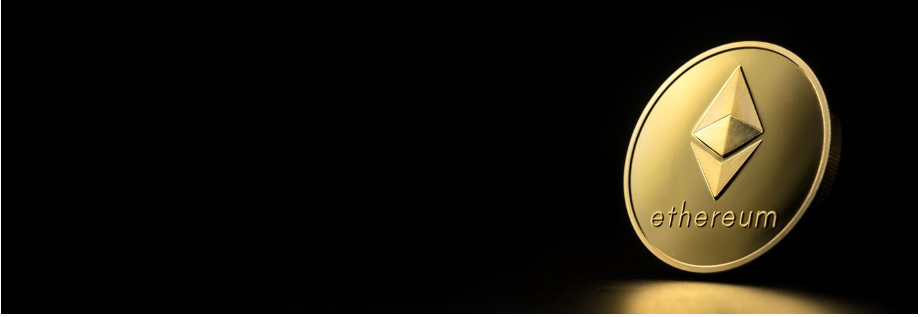

### Contents
1. Abstract
2. Goal
3. Importing required libraries and Dataset
4. Data Visualization
    - Data v/s Volumn graph
    - Performance of Dogecoin in 2024
    - Opening price visualization for 2024
    - Maximum price visualization for 2024
    - Lowest price visualization for 2024
    - Closing price visualization for 2024
    - Adjustment price visualization for 2024
    - Correlation Heatmap
5. Prediction Models
    - Spliting the dataset into 70:30 ratio
    - Deploying the models
        - Linear Regression
        - Decision Tree Regression
        - Random Forest Regression
        - XgBoost Regression
6. Comparing the accuracy of the models
7. Conclusion

### Abstract
Ethereum is an open-source, blockchain-oriented platform that enables decentralized computing and the execution of smart contracts. It allows developers to deploy public blockchain services, targeting the Business-to-Consumer (B2C) market. Ethereum’s native token, ether (ETH), is used to facilitate transactions and interactions within the network.

### Goal
1. The goal of this project is to make a Prediction model which will predict the price of the Ethereum in the future times depending on the previous parameters.
2. To compare how different models fits the given dataset.


### Importing Libraries and Dataset

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [76]:
df = pd.read_csv('ETH-USD.csv')

In [77]:
df.head(11)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
1,2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2,2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
3,2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
4,2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984
5,2017-11-14,316.763000,340.177002,316.763000,337.631012,337.631012,1069680000
6,2017-11-15,337.963989,340.911987,329.812988,333.356995,333.356995,722665984
7,2017-11-16,333.442993,336.158997,323.605988,330.924011,330.924011,797254016
8,2017-11-17,330.166992,334.963989,327.523010,332.394012,332.394012,621732992
9,2017-11-18,331.980011,349.615997,327.687012,347.612000,347.612000,649638976


In [78]:
df1 = df.tail(135)
df1.head()

,Date,Open,High,Low,Close,Adj Close,Volume
2221,2023-12-09,2358.686035,2401.760498,2331.666016,2341.175293,2341.175293,10613312823
2222,2023-12-10,2341.440186,2376.749756,2323.405762,2352.462646,2352.462646,7369608905
2223,2023-12-11,2352.496582,2354.914062,2160.358154,2224.578857,2224.578857,17989249470
2224,2023-12-12,2224.391113,2242.551270,2166.770020,2202.038086,2202.038086,11391132228
2225,2023-12-13,2202.600342,2283.099121,2150.754395,2260.648682,2260.648682,12576395493


Here we see the data ranges from 2017 to 2024.

Let Check the null values in the dataset

In [79]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [80]:
#list of features which has missing values
features_with_na=[features for features in df.columns if df[features].isnull().sum()>1]
 
#print the feature name and the percentage of missing values
for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')

### Data Visualization
Data visualization is the graphical representation of information and data. By using visual elements like charts, graphs, and maps.

**A. Date v/s Volumn Graph**

Text(0.5, 1.0, 'Date vs Volume')

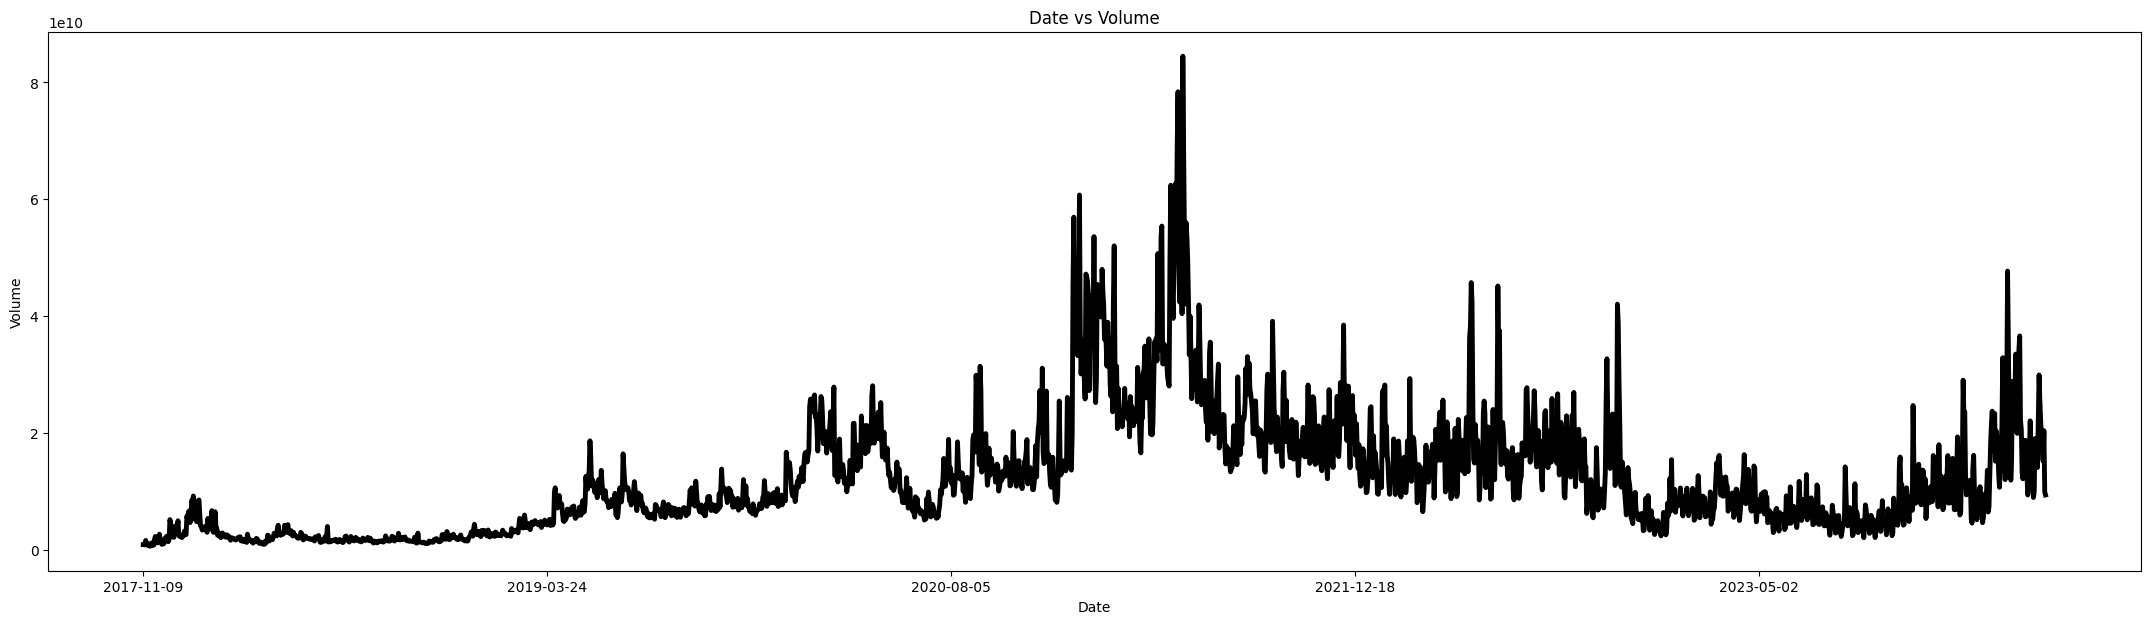

In [81]:
plt.figure(figsize=(27,7))
df.groupby('Date')['Volume'].median().plot(linewidth = 3.5, color = 'k')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title("Date vs Volume")

**B. Performance of Ethereum in the year 2024**

Text(0.5, 1.0, 'Date vs Volume of 2024')

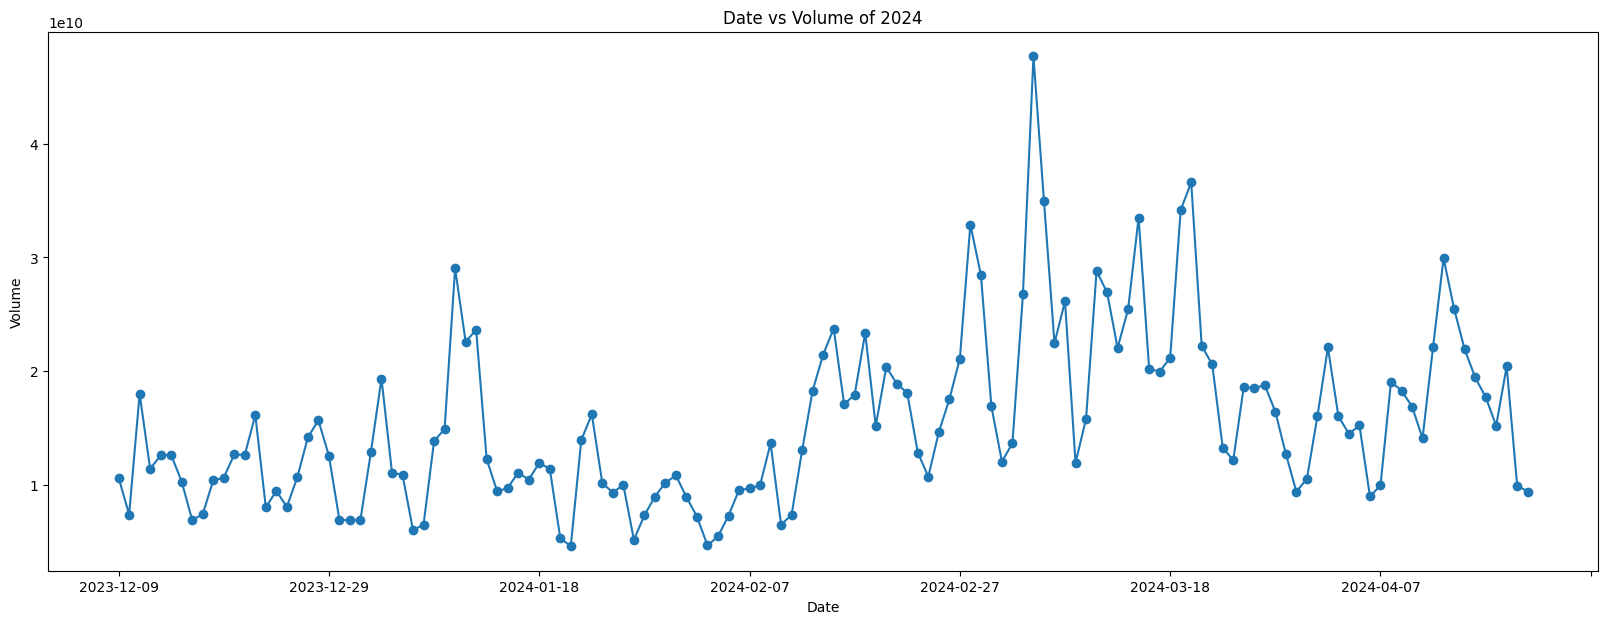

In [82]:
plt.figure(figsize=(20,7))
df1.groupby('Date')['Volume'].mean().plot(linewidth = 1.5, marker ='o')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title("Date vs Volume of 2024")

**C. Opening price for Ethereum everyday throughout the year 2024**

Text(0.5, 1.0, 'Date vs Open of 2024')

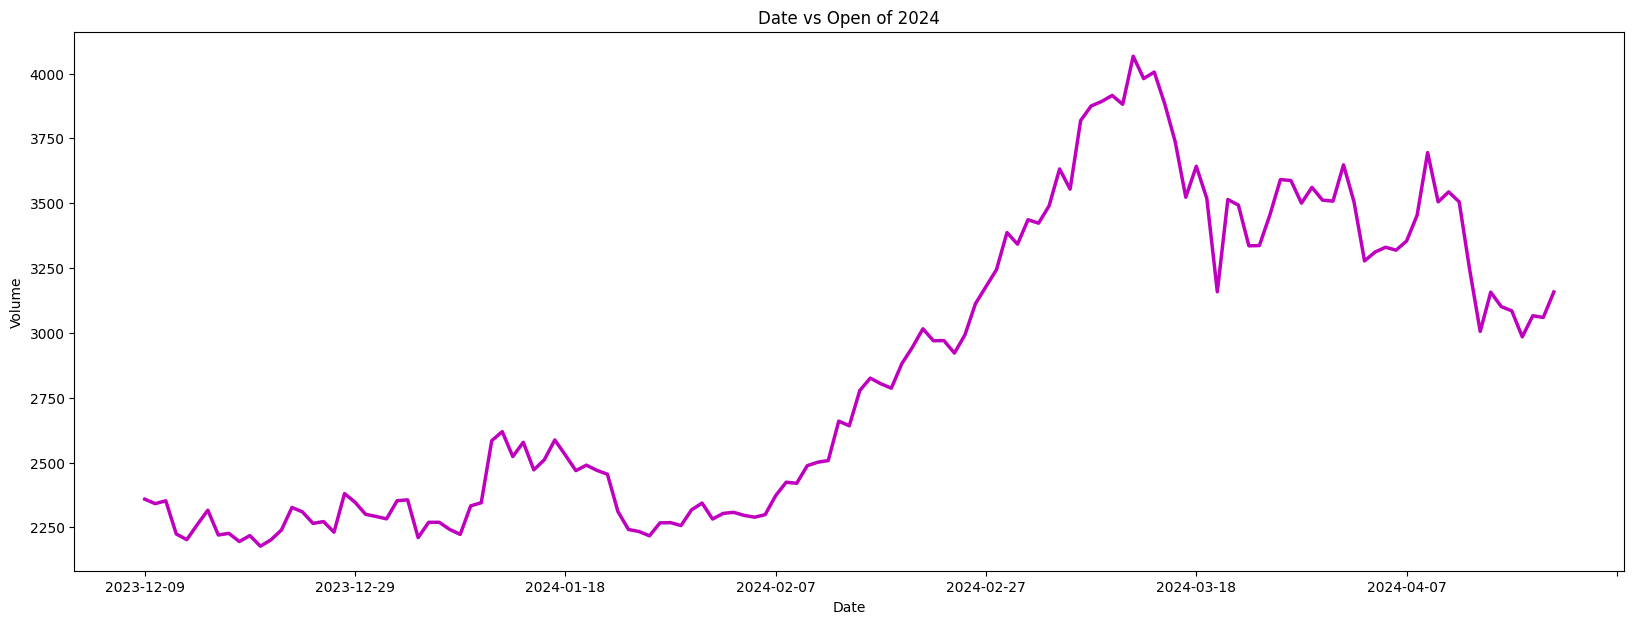

In [83]:
plt.figure(figsize=(20,7))
df1.groupby('Date')['Open'].mean().plot(linewidth = 2.5, color = 'm')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title("Date vs Open of 2024")

**D. Maximum price achieved by Ethereum everyday throughout the year 2024**

Text(0.5, 1.0, 'Date vs High of 2024')

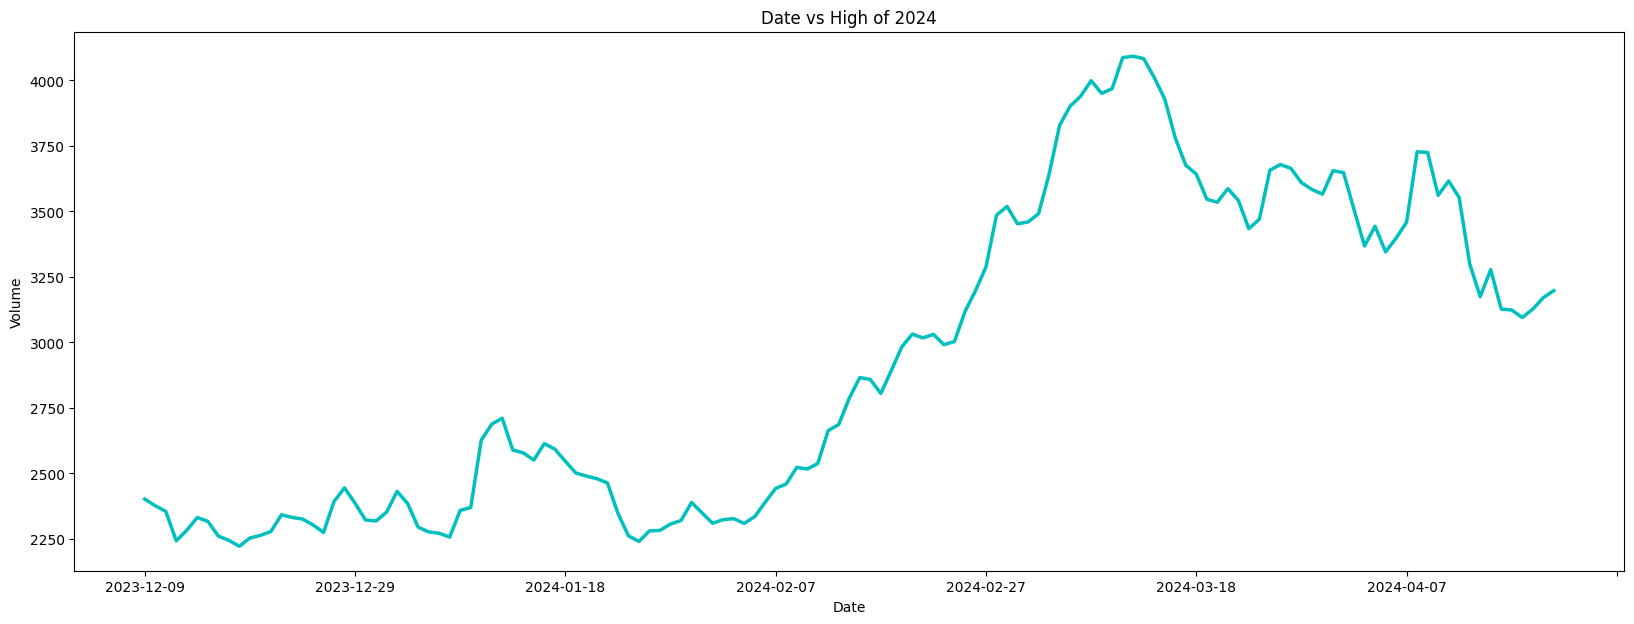

In [84]:
plt.figure(figsize=(20,7))
df1.groupby('Date')['High'].mean().plot(linewidth = 2.5, color = 'c')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title("Date vs High of 2024")

**E. Lowest price achieved by Ethereum everyday throughout the year 2024**

Text(0.5, 1.0, 'Date vs Low of 2024')

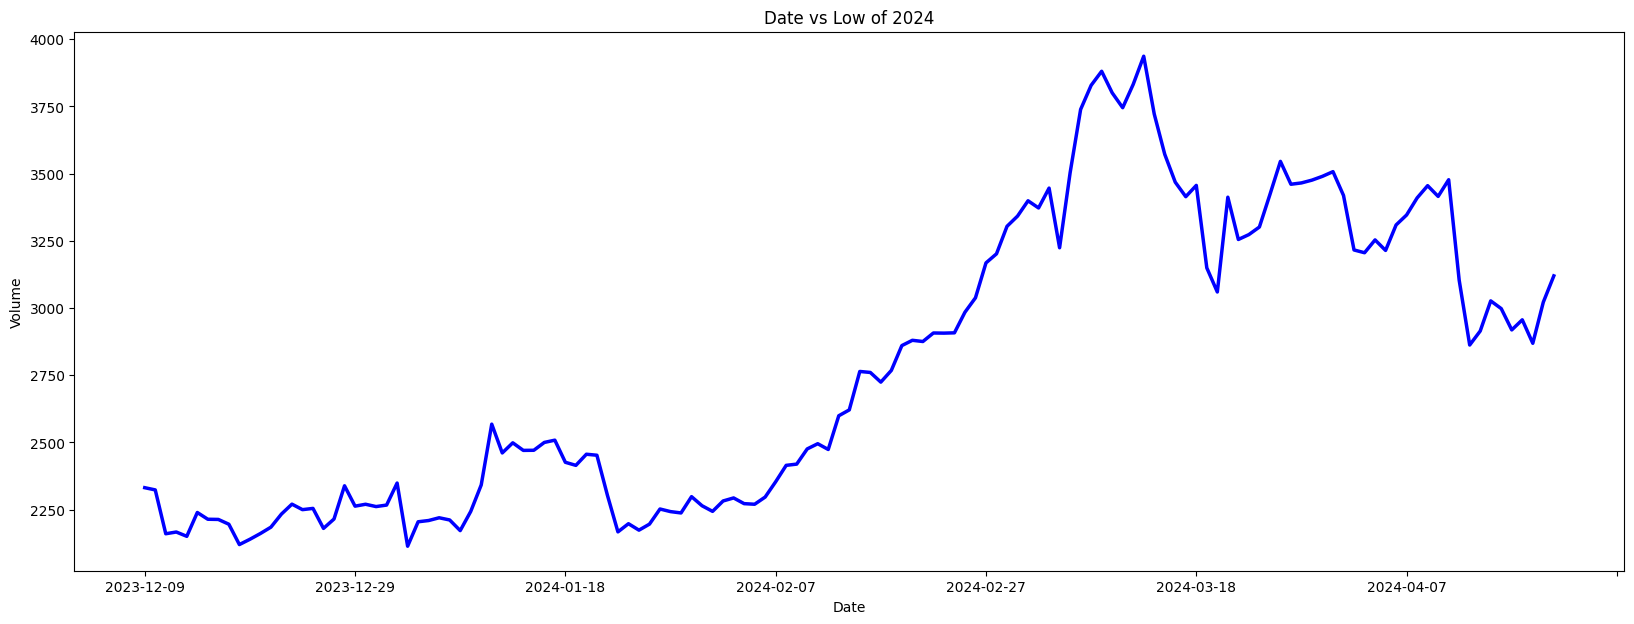

In [85]:
plt.figure(figsize=(20,7))
df1.groupby('Date')['Low'].mean().plot(linewidth = 2.5, color = 'b')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title("Date vs Low of 2024")

**F. Closing price achieved by Ethereum everyday throughout the year 2024**

Text(0.5, 1.0, 'Date vs Close of 2024')

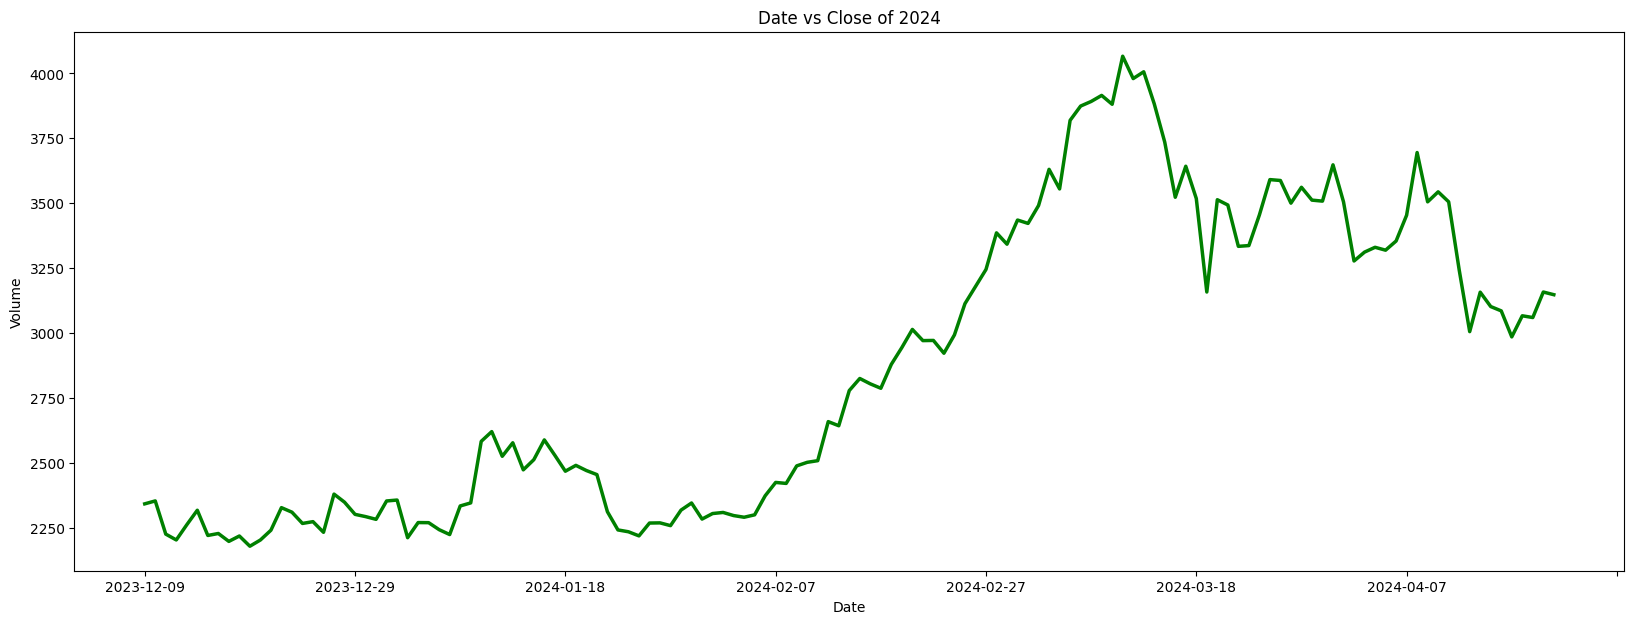

In [86]:
plt.figure(figsize=(20,7))
df1.groupby('Date')['Close'].mean().plot(linewidth = 2.5, color = 'g')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title("Date vs Close of 2024")

**G. Adjustment price of Ethereum everyday throughout the year 2024**

Text(0.5, 1.0, 'Date vs Adj Close of 2024')

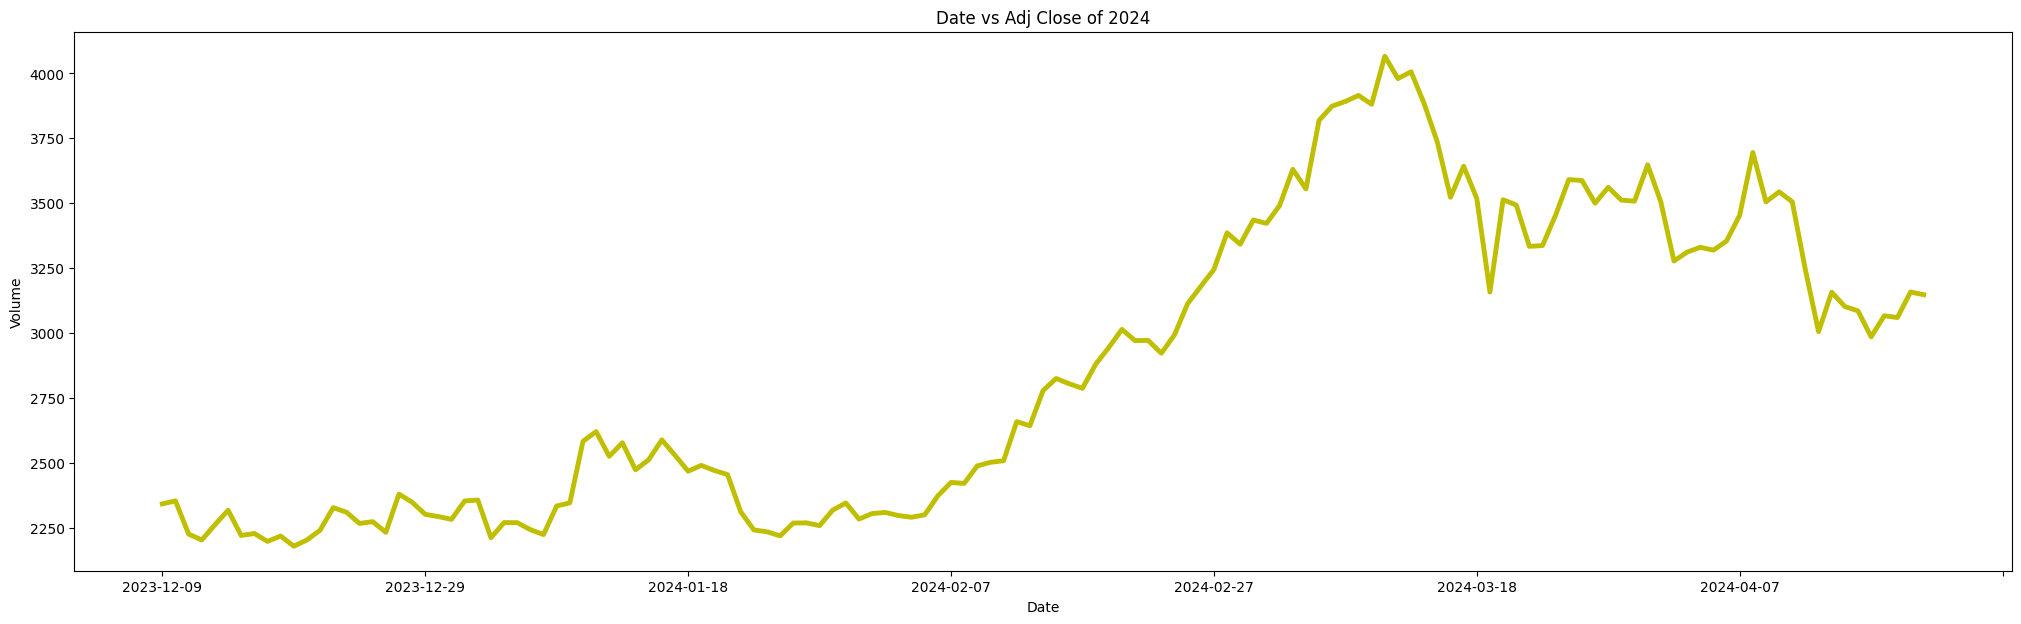

In [87]:
plt.figure(figsize=(25,7))
df1.groupby('Date')['Adj Close'].mean().plot(linewidth = 3.5, color = 'y')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title("Date vs Adj Close of 2024")

#### G. Lets Check the correlation between features of the dataset. How much they close to eachother.

In [88]:
new_df =pd.read_csv('ETH-USD.csv', usecols = ['Open','High','Low','Close','Volume']).fillna(method='ffill')

C:\Users\ashis\AppData\Local\Temp\ipykernel_10900\272978933.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  new_df =pd.read_csv('ETH-USD.csv', usecols = ['Open','High','Low','Close','Volume']).fillna(method='ffill')


<Axes: >

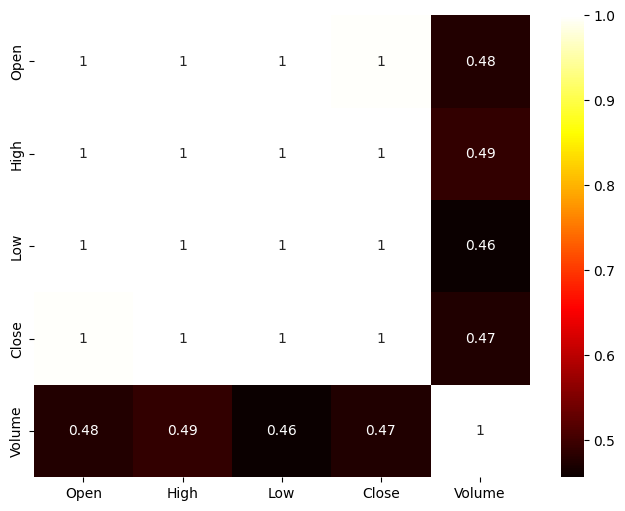

In [89]:
plt.figure(figsize = (8,6))
sns.heatmap(new_df.corr() , cmap = 'hot', annot = True)

From the above figure we can see that all the features are closely related to each other.

***************
##   Prediction Model Creation

Predictive modeling, also called predictive analytics, is a mathematical process that seeks to predict future events or outcomes by analyzing patterns that are likely to forecast future results.

Now to build that prediction model I am going to use regression algorithms. Now let's find out what is regression algorithms?

Regression analysis consists of a set of machine learning methods that allow us to predict a continuous outcome variable (y) based on the value of one or multiple predictor variables (x). Briefly, the goal of regression model is to build a mathematical equation that defines y as a function of the x variables.

Here we are going to prepare several Regression machine learning models based on those we will do a comparative analysis that which model is better among them.

I have decided to go with 4 regression models to evaluate this dataset - 

* **Linear Regression** : Linear Regression is a machine learning algorithm based on supervised learning. Linear regression performs the task to predict a dependent variable value (y) based on a given independent variable (x). So, this regression technique finds out a linear relationship between x (input) and y(output).


* **Random Forest Regression** : Random Forest Regression is a supervised learning algorithm that uses ensemble learning method for regression. A Random Forest operates by constructing several decision trees during training time and outputting the mean of the classes as the prediction of all the trees.


* **Decision Tree Regression** : Decision tree builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. Decision trees can handle both categorical and numerical data.


* **XgBoost Regressor** : XGBoost is a powerful approach for building supervised regression models. ... Ensemble learning involves training and combining individual models (known as base learners) to get a single prediction, and XGBoost is one of the ensemble learning methods.

Let's deploy the models...

**Training and Testing Dataset Spliting using the `train_test_split`**
  
  * Immporting the library from the sklearn.model_selection
  * Split the dataset into 70:30 ratio
  * x_train and y_train are the trainning datasets
  * x_test and y_test are the testing datasets
  * After the spliting of the datasets the model is ready to be prepared!

In [90]:
X = new_df.drop('High', axis=1)
y = new_df['High']

print('Shape of X = ', X.shape)
print('Shape of y = ', y.shape)

Shape of X =  (2356, 4)
Shape of y =  (2356,)


In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

print('Shape of X_train = ', X_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_test = ', y_test.shape)

Shape of X_train =  (1413, 4)
Shape of y_train =  (1413,)
Shape of X_test =  (943, 4)
Shape of y_test =  (943,)


### Random Forest Regression 
Random Forest Regression is a supervised learning algorithm that uses ensemble learning method for regression. A Random Forest operates by constructing several decision trees during training time and outputting the mean of the classes as the prediction of all the trees.

In [92]:
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

In [93]:
regressor = RandomForestRegressor(n_estimators=500, criterion='squared_error', random_state=0)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500, random_state=0)

In [94]:
y_pred = regressor.predict(X_test)
print(f'Mean Absolute Error(MAE): {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Residual Sum of Squares(MSE): {metrics.mean_squared_error(y_test, y_pred)}')
print(f'R2-Score: {metrics.r2_score(y_test, y_pred)}')

Mean Absolute Error(MAE): 15.350734414983528
Residual Sum of Squares(MSE): 1063.5690040329373
R2-Score: 0.9992018525828175


In [95]:
y_pred = regressor.predict(X_test)

In [96]:
ds = pd.DataFrame()
ds['High']=y_test

In [97]:
ds['Prediction']=y_pred
ds.head(11)

,High,Prediction
672,181.998566,182.039658
1185,1738.314453,1737.145666
1652,2028.388184,2012.071051
611,276.685242,277.082557
179,795.757996,836.430264
1927,1705.309082,1722.389446
1561,3154.615234,3057.850100
1694,1103.690430,1130.248143
677,213.731949,215.919346
831,283.196136,279.714490


<Axes: >

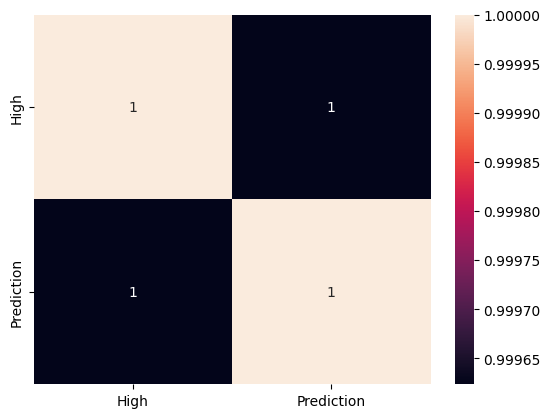

In [98]:
sns.heatmap(ds.corr(), annot = True)

### Simple Linear Regression
Linear Regression is a machine learning algorithm based on supervised learning. Linear regression performs the task to predict a dependent variable value (y) based on a given independent variable (x). So, this regression technique finds out a linear relationship between x (input) and y(output).

In [99]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [100]:
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [101]:
y_pred = regr.predict(X_test)
print(f'Mean Absolute Error(MAE): {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Residual Sum of Squares(MSE): {metrics.mean_squared_error(y_test, y_pred)}')
print(f'R2-Score: {metrics.r2_score(y_test, y_pred)}')

Mean Absolute Error(MAE): 15.54594356092446
Residual Sum of Squares(MSE): 805.502354939417
R2-Score: 0.9993955167725916


In [102]:
y_pred = regressor.predict(X_test)
ds = pd.DataFrame()
ds['High']=y_test
ds['Prediction']=y_pred
ds.head(11)


,High,Prediction
672,181.998566,182.039658
1185,1738.314453,1737.145666
1652,2028.388184,2012.071051
611,276.685242,277.082557
179,795.757996,836.430264
1927,1705.309082,1722.389446
1561,3154.615234,3057.850100
1694,1103.690430,1130.248143
677,213.731949,215.919346
831,283.196136,279.714490


<Axes: >

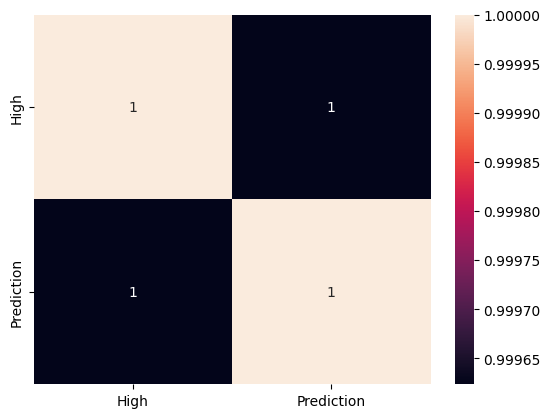

In [103]:
sns.heatmap(ds.corr(), annot = True)

### Decision Tree Regressor
Decision tree builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. Decision trees can handle both categorical and numerical data.

In [104]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

In [105]:
y_pred = dtr.predict(X_test)
print(f'Mean Absolute Error(MAE): {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Residual Sum of Squares(MSE): {metrics.mean_squared_error(y_test, y_pred)}')
print(f'R2-Score: {metrics.r2_score(y_test, y_pred)}')

Mean Absolute Error(MAE): 20.264514846235418
Residual Sum of Squares(MSE): 1630.2908819096626
R2-Score: 0.9987765603813966


In [106]:
y_pred = regressor.predict(X_test)
ds = pd.DataFrame()
ds['High']=y_test
ds['Prediction']=y_pred
ds.head(11)

,High,Prediction
672,181.998566,182.039658
1185,1738.314453,1737.145666
1652,2028.388184,2012.071051
611,276.685242,277.082557
179,795.757996,836.430264
1927,1705.309082,1722.389446
1561,3154.615234,3057.850100
1694,1103.690430,1130.248143
677,213.731949,215.919346
831,283.196136,279.714490


<Axes: >

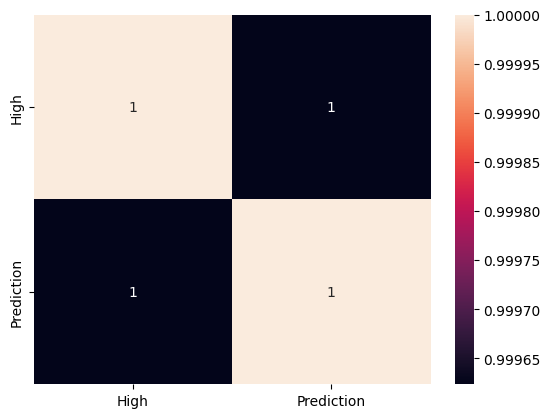

In [107]:
sns.heatmap(ds.corr(), annot = True)

### XgBoost Regressor 
XGBoost is a powerful approach for building supervised regression models. Ensemble learning involves training and combining individual models (known as base learners) to get a single prediction, and XGBoost is one of the ensemble learning methods.

In [108]:
from xgboost.sklearn import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [109]:
y_pred = xgb.predict(X_test)
print(f'Mean Absolute Error(MAE): {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Residual Sum of Squares(MSE): {metrics.mean_squared_error(y_test, y_pred)}')
print(f'R2-Score: {metrics.r2_score(y_test, y_pred)}')

Mean Absolute Error(MAE): 18.628148901121236
Residual Sum of Squares(MSE): 1194.7248123716854
R2-Score: 0.9991034276858177


In [110]:
y_pred = xgb.predict(X_test)
ds = pd.DataFrame()
ds['High']=y_test
ds['Prediction']=y_pred
ds.head(11)

,High,Prediction
672,181.998566,180.326584
1185,1738.314453,1735.539551
1652,2028.388184,2018.557129
611,276.685242,273.208954
179,795.757996,835.875183
1927,1705.309082,1719.869751
1561,3154.615234,3069.752930
1694,1103.690430,1110.952515
677,213.731949,213.771881
831,283.196136,274.343445


<Axes: >

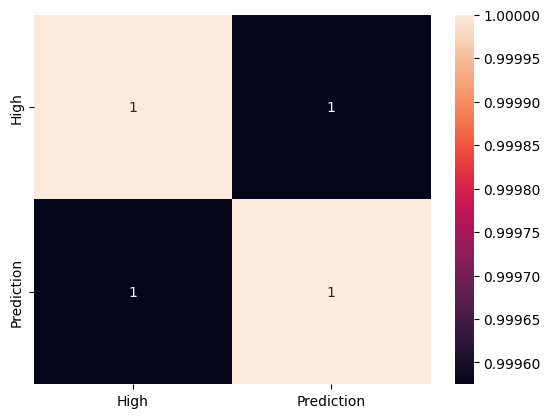

In [111]:
sns.heatmap(ds.corr(), annot = True)

------------------------
### Comparative analysis among the algorithms for this project

We have deployed nine machine learning algorithms and every algorithm is deployed successfully without any hesitation. We have checked the accuracy of the models based on the accuracy score of each of the models. Now let's take a look at the scores of each models.

|Name of the Model|Accuracy Score / R2_Scores
|:---:|:---:|
|Linear Regression|99.94%|
|Random Forest Regressor|99.93%|
|XgBoost Regressor|99.90%|
|Decision Tree Regressor|99.89%|

### Conclusion

**Comparing all those scores scored by the machine learning algorithms, it is clear that Linear Regression is having the upper hand in case of this dataset and after this, we can use  Random Forest Regression, which is also having good score as compared to the other deployed algorithms . Although there is only a slight difference between R2-Scores **

Best Fitted Models ranking - 
1. Linear Regression
2. Random Forest Regression
3. XgBoosting Regression
4. Decision Tree Regressor

Hooray!! The models are deployed successfully!

